In [1]:
import os, numpy as np, matplotlib.pyplot as plt, collections, yaml

In [2]:
main_dir = '../results_save/cat[]thinspiral_1000'
settings = yaml.load(open('../load_results/plot_settings.yaml').read(), Loader = yaml.FullLoader)
support, mass = collections.defaultdict(list), collections.defaultdict(list)
for sub_dir in os.listdir(main_dir):
    if 'S[0]' not in sub_dir: continue
    method_name = sub_dir[:sub_dir.find('_')]
    _support = np.load(os.path.join(main_dir, sub_dir, 'support.npy'))
    _mass = np.load(os.path.join(main_dir, sub_dir, 'mass.npy'))
    support[method_name].append(_support)
    mass[method_name].append(_mass)
for method_name in support.keys():
    support[method_name] = np.array(support[method_name])
    mass[method_name] = np.array(mass[method_name])
support_diff, mass_diff = {}, {}
for method_name in support.keys():
    particle_num = support[method_name].shape[-2]
    support_diff[method_name] = support[method_name][:, 1:, :, :] - support[method_name][:, :-1, :, :] # seed, iter, index, dimension
    mass_diff[method_name] = mass[method_name][:, 1:, :] - mass[method_name][:, :-1, :] # seed, iter, index
    support_diff[method_name] = np.sqrt((support_diff[method_name] ** 2).sum(axis = -1)).max(axis = -1) # seed, iter
    mass_diff[method_name] = np.abs(mass_diff[method_name]).max(axis = -1) * particle_num # seed, iter

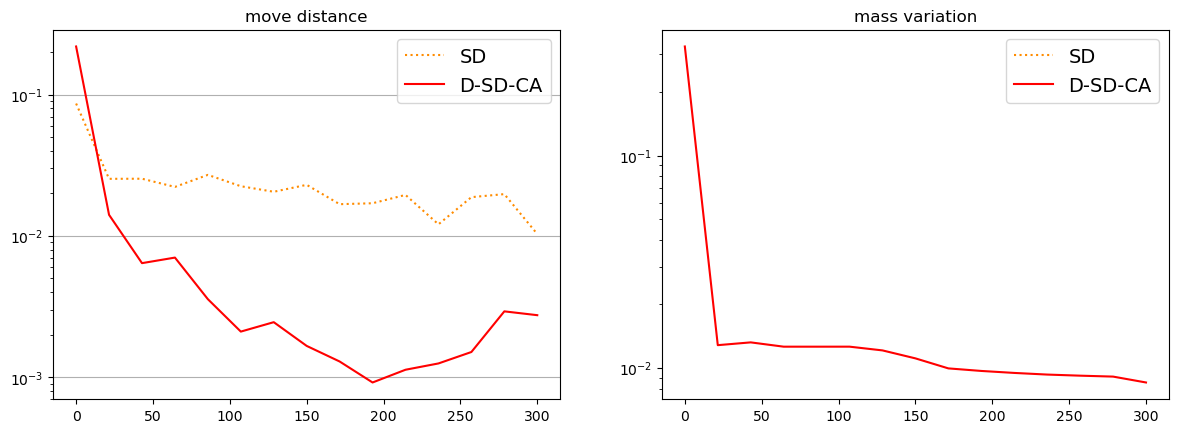

In [3]:
plt.figure(figsize = (7.2 * 2, 4.8))
plt.subplot(121)
for method_name in ['SD', 'SDCA']:
    if method_name not in support_diff.keys():
        continue
    x_axis = np.linspace(0, 300, support_diff[method_name].shape[-1])
    plt.errorbar(
        x_axis, support_diff[method_name].mean(axis = 0), 
        color = settings['color'][method_name], 
        linestyle = settings['linestyle'][method_name], 
        label = settings['label'][method_name], 
        alpha = 1.0, linewidth = 1.5
    )
plt.title('move distance')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.grid(axis = 'y')
plt.subplot(122)
for method_name in ['SD', 'SDCA']:
    if method_name not in support_diff.keys():
        continue
    x_axis = np.linspace(0, 300, mass_diff[method_name].shape[-1])
    plt.errorbar(
        x_axis, mass_diff[method_name].mean(axis = 0), 
        color = settings['color'][method_name], 
        linestyle = settings['linestyle'][method_name], 
        label = settings['label'][method_name], 
        alpha = 1.0, linewidth = 1.5
    )
plt.title('mass variation')
plt.yscale('log')
plt.legend(fontsize = 14)


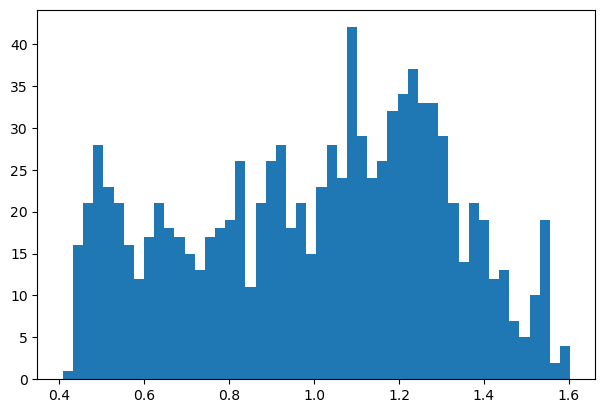

In [4]:
plt.figure(figsize = (7.2, 4.8))
plt.hist(mass['SDCA'][0, -1, :] * particle_num, bins = 50)
print('')